<a href="https://colab.research.google.com/github/RifatMuhtasim/R_Programming_Language/blob/main/1.08.Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlation

In [1]:
# Correlation coefficient between x and y
x <- c(5,7,9,2,4,3,9)
y <- c(3,8,7,7,5,4,6)
cor(x, y)

[1] 0.3659754

In [2]:
# Bodyfat data
install.packages("mfp", dependencies = TRUE)
library(mfp)
data("bodyfat")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘numDeriv’


Loading required package: survival



#### **Q1: Calculate BMI in the bodyfat dataset and save the data in your convenient format.**

In [3]:
bodyfat$bmi <- bodyfat$weight * 703 / bodyfat$height ^ 2
str(bodyfat$bmi)
head(bodyfat)

 num [1:252] 23.6 23.3 24.7 24.9 25.5 ...


,case,brozek,siri,density,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist,bmi
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,12.6,12.3,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.62446
2,2,6.9,6.1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.33205
3,3,24.6,25.3,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.66632
4,4,10.9,10.4,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.88078
5,5,27.8,28.7,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.51485
6,6,20.6,20.9,1.0502,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8,26.45263


#### **Q2: Draw a scatter plot of siri and neck. Also draw the fitter line on the scatter plot. Calculate the correlation coefficient and comment on it.**

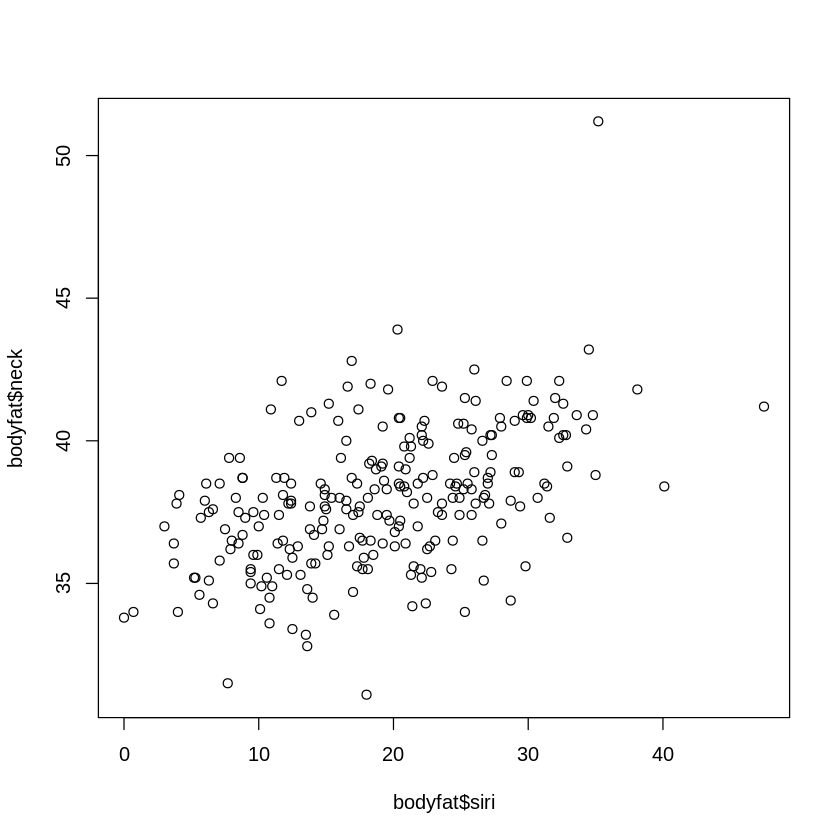

In [4]:
plot(bodyfat$siri, bodyfat$neck)


Call:
lm(formula = siri ~ neck, data = bodyfat)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2331  -5.3819  -0.2498   5.4919  22.9312 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -45.0150     7.2229  -6.232 1.94e-09 ***
neck          1.6889     0.1897   8.902  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.307 on 250 degrees of freedom
Multiple R-squared:  0.2407,	Adjusted R-squared:  0.2376 
F-statistic: 79.24 on 1 and 250 DF,  p-value: < 2.2e-16


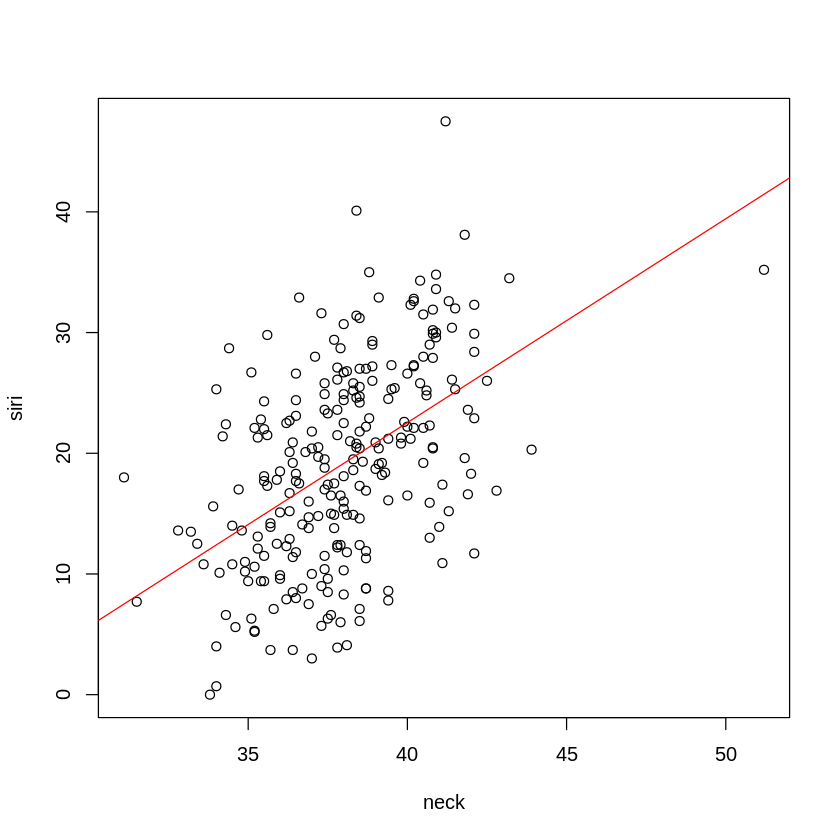

In [5]:
reg1 <- lm(siri ~ neck, data=bodyfat)
summary(reg1)
with(bodyfat , plot(neck, siri)) # x and y label
abline(reg1, col="red") # Regression line

In [6]:
# Pearson Correlation Coefficient:
cor(bodyfat$neck, bodyfat$siri, method="pearson")

[1] 0.4905919

#### **Q3: Draw a scatte plot of siri and bmi. Also draw the fitted line on the scatter plot**

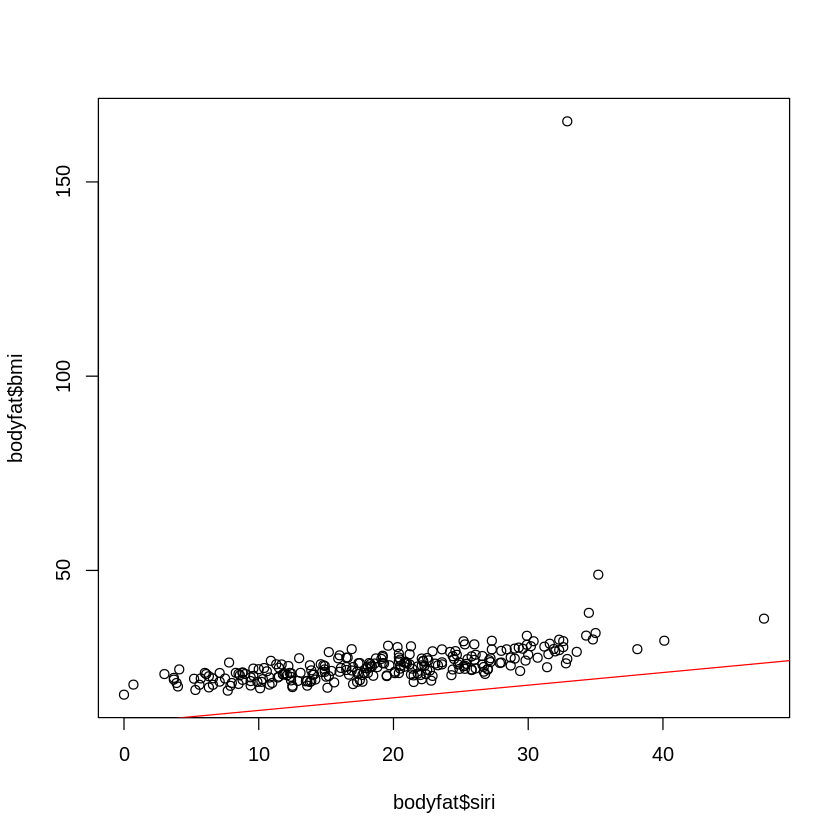

In [7]:
plot(bodyfat$siri, bodyfat$bmi)
reg1 <- lm(siri ~ bmi, data=bodyfat)
abline(reg1, col="red")

## Shapiro-Wilk Test for Normality

In [8]:
# Shapiro-Wilk normality test for siri
shapiro.test(bodyfat$siri)


	Shapiro-Wilk normality test

data:  bodyfat$siri
W = 0.99168, p-value = 0.1649


In [9]:
# Shapiro-Wilk normality test for BMI
shapiro.test(bodyfat$bmi)


	Shapiro-Wilk normality test

data:  bodyfat$bmi
W = 0.28321, p-value < 2.2e-16


**Basic Scatter Plot Matrix**

In [10]:
# Subset with three variables
bodyfat3 <- bodyfat[, c('siri', 'neck', 'bmi')]
head(bodyfat3)

,siri,neck,bmi
,<dbl>,<dbl>,<dbl>
1,12.3,36.2,23.62446
2,6.1,38.5,23.33205
3,25.3,34.0,24.66632
4,10.4,37.4,24.88078
5,28.7,34.4,25.51485
6,20.9,39.0,26.45263


In [11]:
# Row-wise delete missing values (n=251)
bodyfat4 <- bodyfat3[complete.cases(bodyfat3), ]

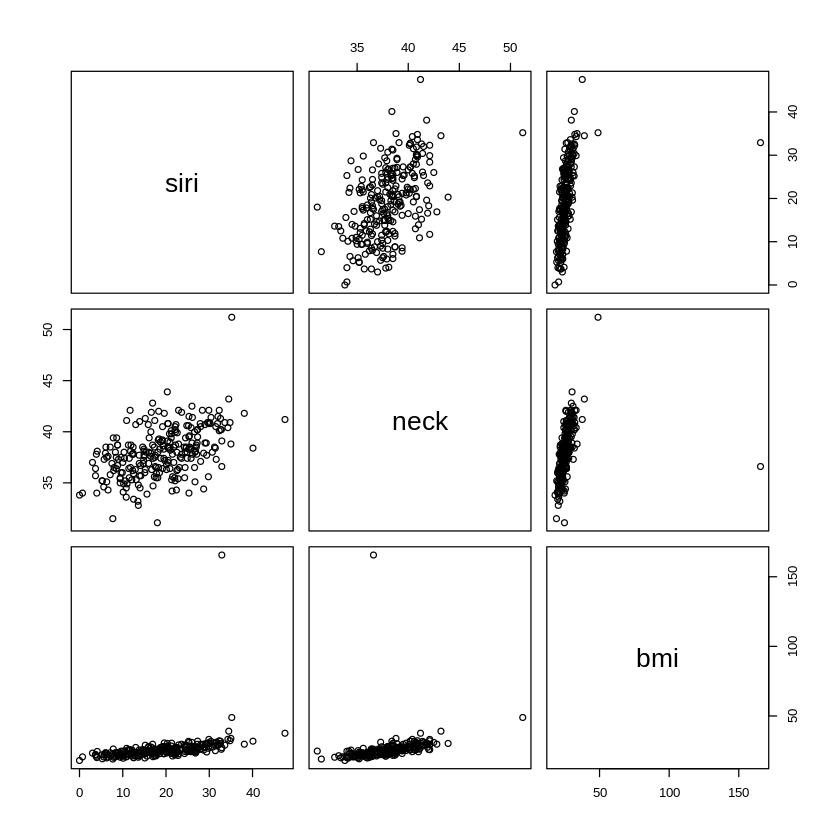

In [12]:
# Scatter Plot Matrix
pairs(~ siri + neck + bmi, data=bodyfat4)

#### Scatter plot matrix with correlation coefficients

In [13]:
panel.cor <- function(x, y,digits=2, cex.cor, ...){
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(0, 1, 0, 1))

# correlation coefficient
  r <- cor(x, y, method = "pearson")
  txt <- format(c(r, 0.123456789), digits = digits)[1]
  txt <- paste("r= ", txt, sep = "")
  text(0.4, 0.8, txt)

# p-value calculation
  p <- cor.test(x, y, method = "pearson")$p.value
  txt2 <- format(c(p, 0.123456789), digits = digits)[1]
  txt2 <- paste("p= ", txt2, sep = "")
  if(p<0.01) txt2 <- paste("p= ", "<0.01", sep = "")
  text(0.4, 0.3, txt2)
}

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”


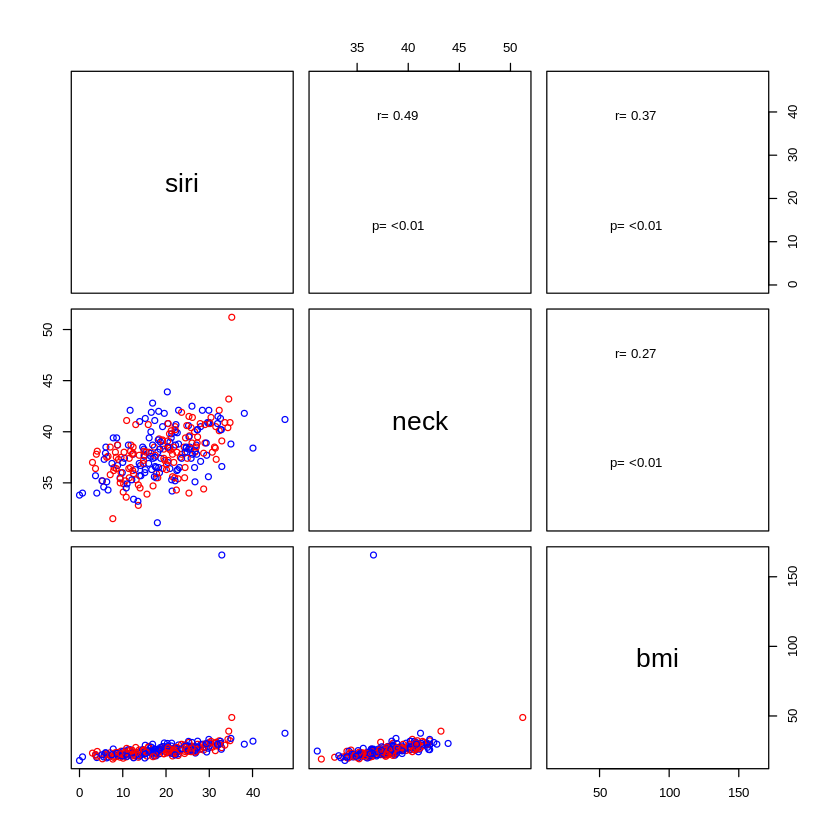

In [14]:
# Scatterplot matrix with correlation
pairs(bodyfat4,col=c("red","blue"),upper.panel = 	panel.cor)